In [1]:
import re
import pandas as pd
import numpy as np
import requests
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import nltk
from nltk.corpus import stopwords
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5EncoderModel


## Data Gathering

In [5]:
## First api call for testing

url = f'https://api.spoonacular.com/recipes/716429/information'  # Where to get all ids
api_key = "35d63b20dc5e4f80967bdde96460aa62"
params = {
    'apiKey': api_key,
}
response = requests.get(url, params = params)

## Fixes response 200 glitch
if response.status_code == 200:
    response = response.json()
response

{'vegetarian': False,
 'vegan': False,
 'glutenFree': False,
 'dairyFree': False,
 'veryHealthy': False,
 'cheap': False,
 'veryPopular': False,
 'sustainable': False,
 'lowFodmap': False,
 'weightWatcherSmartPoints': 16,
 'gaps': 'no',
 'preparationMinutes': -1,
 'cookingMinutes': -1,
 'aggregateLikes': 209,
 'healthScore': 18,
 'creditsText': 'Full Belly Sisters',
 'license': 'CC BY-SA 3.0',
 'sourceName': 'Full Belly Sisters',
 'pricePerServing': 157.06,
 'extendedIngredients': [{'id': 1001,
   'aisle': 'Milk, Eggs, Other Dairy',
   'image': 'butter-sliced.jpg',
   'consistency': 'SOLID',
   'name': 'butter',
   'nameClean': 'butter',
   'original': '1 tbsp butter',
   'originalName': 'butter',
   'amount': 1.0,
   'unit': 'tbsp',
   'meta': [],
   'measures': {'us': {'amount': 1.0, 'unitShort': 'Tbsp', 'unitLong': 'Tbsp'},
    'metric': {'amount': 1.0, 'unitShort': 'Tbsp', 'unitLong': 'Tbsp'}}},
  {'id': 10011135,
   'aisle': 'Produce',
   'image': 'cauliflower.jpg',
   'consistenc

# Get recipe information for "Italian Cuisine"

In [12]:
recipeURL = f'https://api.spoonacular.com/recipes/complexSearch'  # Where to get all ids


italian_query = {
    'cuisine': 'italian'
}

cuisineParams = {
    'api_key': api_key,
    "query": italian_query
}
response_forID = requests.get(recipeURL, params = cuisineParams)
## Fixes response 200 glitch
if response_forID.status_code == 200:
    response_forID = response_forID.json()
response

{'status': 'failure',
 'code': 401,
 'message': 'You are not authorized. Please read https://spoonacular.com/food-api/docs#Authentication'}

In [14]:
# Function to search for recipes based on the provided query
def search_recipes(query, cuisine, API_KEY = api_key):
    """
    Input:
     - Query: str (example = "pasta")
     - Cuisine: str (example = "italian")
     - API_KEY: str
    """
    url = f'https://api.spoonacular.com/recipes/complexSearch'
    params = {
        'apiKey': API_KEY,
        'query': query,
        'number': 50,
        'cuisine': cuisine,
        'instructionsRequired': True,
        'addRecipeInformation': True,
        'fillIngredients': True,
    }

    # Send a GET request to the Spoonacular API with the query parameters
    response = requests.get(url, params=params)
    # If the API call is successful
    if response.status_code == 200:
        # Parse the API response as JSON data
        data = response.json()
        # Return the list of recipe results
        return data['results']
    # If the API call is not successful
    return []

# Get italian recipes on API

In [17]:
italian_recipes = search_recipes("", cuisine="italian")
italian_recipes[0]

{'vegetarian': False,
 'vegan': False,
 'glutenFree': False,
 'dairyFree': False,
 'veryHealthy': False,
 'cheap': False,
 'veryPopular': True,
 'sustainable': False,
 'lowFodmap': False,
 'weightWatcherSmartPoints': 6,
 'gaps': 'no',
 'preparationMinutes': 5,
 'cookingMinutes': 10,
 'aggregateLikes': 910,
 'healthScore': 39,
 'creditsText': 'Jen West',
 'sourceName': 'Pink When',
 'pricePerServing': 183.99,
 'extendedIngredients': [{'id': 11333,
   'aisle': 'Produce',
   'image': 'green-pepper.jpg',
   'consistency': 'SOLID',
   'name': 'bell pepper',
   'nameClean': 'green pepper',
   'original': 'green bell pepper, chopped',
   'originalName': 'green bell pepper, chopped',
   'amount': 6.0,
   'unit': 'servings',
   'meta': ['green', 'chopped'],
   'measures': {'us': {'amount': 6.0,
     'unitShort': 'servings',
     'unitLong': 'servings'},
    'metric': {'amount': 6.0,
     'unitShort': 'servings',
     'unitLong': 'servings'}}},
  {'id': 11297,
   'aisle': 'Produce',
   'image': 

In [20]:
first = italian_recipes[0]
first["image"]

'https://img.spoonacular.com/recipes/715495-312x231.jpg'

# get the columns of interest from italian recipes from API


In [23]:
# get the columns if interest from italian recipes from API
out = []
keys = ["id",  "missedIngredients", "vegan", "cuisines", "summary", "aggregateLikes", "image"]
for recipe in italian_recipes:
  print(recipe["title"])
  data = []
  for key in keys:
    data.append(recipe[key])
  out.append(data)

Turkey Tomato Cheese Pizza
Broccolini Quinoa Pilaf
What to make for dinner tonight?? Bruschetta Style Pork & Pasta
Salmon Quinoa Risotto
Italian Tuna Pasta
Roasted Brussels Sprouts With Garlic
Asparagus Lemon Risotto
Italian Steamed Artichokes
Crispy Italian Cauliflower Poppers Appetizer
Pappa Al Pomodoro
Mushroom Hummus Crostini
Roma Tomato Bruschetta
Easy Cheesy Pizza Casserole
Plantain Pizza
Veggie Lasagna Rolls with Peppery Pecorino Marinara
Vegetable Minestrone Soup
Osso Buco
Winter Vegetable Minestrone Soup
Italian Seafood Stew
Italian String Beans With Anchovies and Breadcrumbs
Pumpkin gnocchi with basil and Parmesan
Golden Beet Panzanella
Easy Skillet Garden Lasagna
Potato Gnocchi With Kale and Mushrooms In A Goat Cheese Sauce
Heart Shaped Spinach Ravioli
Homemade Thin Crust Pizza + Pesto + Potato
Fresh Tomato Risotto with Grilled Green Vegetables
How Sweet It Is Sweet Potato Lasagne
Italian Sausage and Vegetable Soup
Roasted Peppers, Spinach & Feta Pizza
Baked Chicken Caprese


# Create dataframe from Italian recipes

In [26]:
italian_df = pd.DataFrame(out)
italian_df.columns = keys
italian_df.sample(4)

,id,missedIngredients,vegan,cuisines,summary,aggregateLikes,image
2,715538,"[{'id': 10120420, 'amount': 3.0, 'unit': 'cups...",False,"[Mediterranean, Italian, European]",What to make for dinner tonight?? Bruschetta S...,163,https://img.spoonacular.com/recipes/715538-312...
24,646549,"[{'id': 1053, 'amount': 1.0, 'unit': 'Dash', '...",False,"[Mediterranean, Italian, European]",If you want to add more <b>Mediterranean</b> r...,1,https://img.spoonacular.com/recipes/646549-312...
30,1096088,"[{'id': 1055062, 'amount': 4.0, 'unit': '', 'u...",False,"[Mediterranean, Italian, European]",Baked Chicken Caprese might be a good recipe t...,1,https://img.spoonacular.com/recipes/1096088-31...
1,715769,"[{'id': 98840, 'amount': 1.0, 'unit': 'bunch',...",True,"[Mediterranean, Italian, European]",Broccolini Quinoa Pilaf requires approximately...,94,https://img.spoonacular.com/recipes/715769-312...


## Next step is to Label Encode Ingredients to create embeddings:

In [29]:
exampleIngs = italian_df.loc[0,"missedIngredients"]

In [32]:
exampleIngs[0]

{'id': 11333,
 'amount': 6.0,
 'unit': 'servings',
 'unitLong': 'servings',
 'unitShort': 'servings',
 'aisle': 'Produce',
 'name': 'bell pepper',
 'original': 'green bell pepper, chopped',
 'originalName': 'green bell pepper, chopped',
 'meta': ['green', 'chopped'],
 'extendedName': 'green bell pepper',
 'image': 'https://img.spoonacular.com/ingredients_100x100/green-pepper.jpg'}

In [30]:
#Label encode ingredients

allIngs = {} # dictoinary for unique ingredients
counter = 0
for i in range(len(italian_df)):
  theseIngs = italian_df.loc[i, "missedIngredients"]
  for dicto in theseIngs:
    thisId = dicto["id"]
    if thisId not in allIngs:
      allIngs[thisId] = counter
      counter +=1

allIngs

{11333: 0,
 11297: 1,
 10211821: 2,
 18334: 3,
 10211529: 4,
 1041009: 5,
 11549: 6,
 5696: 7,
 10611282: 8,
 98840: 9,
 10211215: 10,
 11282: 11,
 20035: 12,
 6615: 13,
 10112155: 14,
 10120420: 15,
 1033: 16,
 20420: 17,
 10010062: 18,
 11233: 19,
 15076: 20,
 11819: 21,
 11215: 22,
 9152: 23,
 11020420: 24,
 11821: 25,
 10015121: 26,
 2069: 27,
 11098: 28,
 10020052: 29,
 10120052: 30,
 14106: 31,
 11011: 32,
 11304: 33,
 10511297: 34,
 9156: 35,
 11007: 36,
 2004: 37,
 2013: 38,
 2003: 39,
 2027: 40,
 10011693: 41,
 11135: 42,
 1123: 43,
 2044: 44,
 1022020: 45,
 10018079: 46,
 1032: 47,
 1032009: 48,
 11246: 49,
 1065062: 50,
 18064: 51,
 10018029: 52,
 11260: 53,
 10011457: 54,
 16058: 55,
 12698: 56,
 1012014: 57,
 1006972: 58,
 18029: 59,
 11529: 60,
 10023572: 61,
 1036: 62,
 10011549: 63,
 1007057: 64,
 1001026: 65,
 1035: 66,
 18010: 67,
 1022027: 68,
 1077: 69,
 23572: 70,
 10120129: 71,
 10099295: 72,
 18375: 73,
 11156: 74,
 99226: 75,
 2025: 76,
 10620420: 77,
 1037: 78,

In [34]:
# intial list of 0s to change when label encoding

blank = np.zeros(len(allIngs))
blank = list(blank)
allBlanks = [blank for i in range(50)]

In [35]:
italian_df["encodedIngredients"] = allBlanks
italian_df.sample(5)

,id,missedIngredients,vegan,cuisines,summary,aggregateLikes,image,encodedIngredients
46,655847,"[{'id': 18375, 'amount': 1.0, 'unit': 'packet'...",False,"[Mediterranean, Italian, European]",Pesto Veggie Pizza requires about <b>45 minute...,1,https://img.spoonacular.com/recipes/655847-312...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
17,1095742,"[{'id': 10611282, 'amount': 1.0, 'unit': '', '...",False,"[Mediterranean, Italian, European]",Winter Vegetable Minestrone Soup might be just...,1,https://img.spoonacular.com/recipes/1095742-31...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
39,651922,"[{'id': 1001, 'amount': 6.0, 'unit': 'tablespo...",False,"[Mediterranean, Italian, European]",You can never have too many Mediterranean reci...,2,https://img.spoonacular.com/recipes/651922-312...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
14,664737,"[{'id': 2003, 'amount': 1.0, 'unit': 'teaspoon...",False,"[Mediterranean, Italian, European]",Veggie Lasagna Rolls with Peppery Pecorino Mar...,1,https://img.spoonacular.com/recipes/664737-312...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
16,654125,"[{'id': 17276, 'amount': 6.0, 'unit': '', 'uni...",False,"[Mediterranean, Italian, European]",Osso Buco is a Mediterranean main course. This...,2,https://img.spoonacular.com/recipes/654125-312...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Create Ingredient Encodings

In [36]:
allall = [] # this will store the indexes of ingredients present for each dish
for row in range(len(italian_df)):  # For every row
  theseIngs = italian_df.loc[row, "missedIngredients"]  # Get the current ingredients which is a list of dicts
  allInds = []  # Store all ingredients in this row
  for dicto in theseIngs:
    thisId = dicto["id"]  # Gets all the index from our ingredient map
    allInds.append(allIngs[thisId]) # Store indices we need to make ones
  allall.append(allInds)

In [41]:
for i in range(len(allBlanks)):
  current = np.array(allBlanks[i])
  current[allall[i]] = 1
  allBlanks[i]=current
print(allBlanks[0])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Add Encoded Ingredient List

In [42]:
italian_df['labeled']= allBlanks
italian_df.sample(4)

,id,missedIngredients,vegan,cuisines,summary,aggregateLikes,image,encodedIngredients,labeled
15,664565,"[{'id': 2004, 'amount': 1.0, 'unit': '', 'unit...",False,"[Mediterranean, Italian, European]",If you want to add more <b>Mediterranean</b> r...,1,https://img.spoonacular.com/recipes/664565-312...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
16,654125,"[{'id': 17276, 'amount': 6.0, 'unit': '', 'uni...",False,"[Mediterranean, Italian, European]",Osso Buco is a Mediterranean main course. This...,2,https://img.spoonacular.com/recipes/654125-312...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
25,647124,"[{'id': 12061, 'amount': 0.25, 'unit': 'cup', ...",False,"[Mediterranean, Italian, European]",If you want to add more <b>Mediterranean</b> r...,1,https://img.spoonacular.com/recipes/647124-312...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,715769,"[{'id': 98840, 'amount': 1.0, 'unit': 'bunch',...",True,"[Mediterranean, Italian, European]",Broccolini Quinoa Pilaf requires approximately...,94,https://img.spoonacular.com/recipes/715769-312...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Tokenization of Text Summary, Cleans up Description Column

In [47]:
# get english stop words

nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
def clean_text(text, stopWords):

    # Remove HTML tags
    cleaned_text = re.sub(r'<[^>]+>', '', text)

    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)  # Remove extra whitespaces
    cleaned_text = cleaned_text.strip()  # Remove leading/trailing whitespaces
    cleaned_text = cleaned_text.lower()  # Convert to lowercase
    cleaned_text = cleaned_text.replace('\n', ' ')

    # Create a regex pattern to match any of the stopwords
    pattern = r'\b(?:{})\b'.format('|'.join(stopWords))

    # Replace stopwords with an empty string
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    cleaned_text = re.sub("  ", " ", cleaned_text)
    cleaned_text = re.sub("\s+", " ", cleaned_text)
    cleaned_text = re.sub(r"$", " ", cleaned_text)
    return cleaned_text

In [44]:
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-small")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-small")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

## Kmeans model

In [63]:
## Creating X
testCol = italian_df["labeled"]

In [64]:
## Map ids to names
nameMap = {dish["id"]:dish["title"] for dish in all}
nameMap

{715495: 'Turkey Tomato Cheese Pizza',
 715769: 'Broccolini Quinoa Pilaf',
 715538: 'What to make for dinner tonight?? Bruschetta Style Pork & Pasta',
 659109: 'Salmon Quinoa Risotto',
 648279: 'Italian Tuna Pasta',
 658515: 'Roasted Brussels Sprouts With Garlic',
 632935: 'Asparagus Lemon Risotto',
 648257: 'Italian Steamed Artichokes',
 640819: 'Crispy Italian Cauliflower Poppers Appetizer',
 654614: 'Pappa Al Pomodoro',
 1095745: 'Mushroom Hummus Crostini',
 658753: 'Roma Tomato Bruschetta',
 641893: 'Easy Cheesy Pizza Casserole',
 716300: 'Plantain Pizza',
 664737: 'Veggie Lasagna Rolls with Peppery Pecorino Marinara',
 664565: 'Vegetable Minestrone Soup',
 654125: 'Osso Buco',
 1095742: 'Winter Vegetable Minestrone Soup',
 648247: 'Italian Seafood Stew',
 648259: 'Italian String Beans With Anchovies and Breadcrumbs',
 657312: 'Pumpkin gnocchi with basil and Parmesan',
 1095740: 'Golden Beet Panzanella',
 642095: 'Easy Skillet Garden Lasagna',
 656972: 'Potato Gnocchi With Kale and

In [67]:
df_indMap = {v:italian_df.loc[v,"id"] for v in italian_df.index}
df_indMap

{0: 715495,
 1: 715769,
 2: 715538,
 3: 659109,
 4: 648279,
 5: 658515,
 6: 632935,
 7: 648257,
 8: 640819,
 9: 654614,
 10: 1095745,
 11: 658753,
 12: 641893,
 13: 716300,
 14: 664737,
 15: 664565,
 16: 654125,
 17: 1095742,
 18: 648247,
 19: 648259,
 20: 657312,
 21: 1095740,
 22: 642095,
 23: 656972,
 24: 646549,
 25: 647124,
 26: 1095751,
 27: 647563,
 28: 648238,
 29: 658615,
 30: 1096088,
 31: 660292,
 32: 157991,
 33: 648275,
 34: 656571,
 35: 649270,
 36: 648190,
 37: 1096038,
 38: 715573,
 39: 651922,
 40: 642297,
 41: 1046983,
 42: 655400,
 43: 640314,
 44: 648048,
 45: 654835,
 46: 655847,
 47: 641962,
 48: 650045,
 49: 658632}

In [69]:
# adds name of dish to df
italian_df["name"] = np.nan
for row in italian_df.index:
  dfInd_to_dishId = df_indMap[row]  # Turns df index into dish id
  thisName = nameMap[dfInd_to_dishId]
  italian_df.loc[row,"name"] = thisName


In [70]:
dfInd_toName = {i:italian_df.loc[i,"name"] for i in italian_df.index}
dfInd_toName

{0: 'Turkey Tomato Cheese Pizza',
 1: 'Broccolini Quinoa Pilaf',
 2: 'What to make for dinner tonight?? Bruschetta Style Pork & Pasta',
 3: 'Salmon Quinoa Risotto',
 4: 'Italian Tuna Pasta',
 5: 'Roasted Brussels Sprouts With Garlic',
 6: 'Asparagus Lemon Risotto',
 7: 'Italian Steamed Artichokes',
 8: 'Crispy Italian Cauliflower Poppers Appetizer',
 9: 'Pappa Al Pomodoro',
 10: 'Mushroom Hummus Crostini',
 11: 'Roma Tomato Bruschetta',
 12: 'Easy Cheesy Pizza Casserole',
 13: 'Plantain Pizza',
 14: 'Veggie Lasagna Rolls with Peppery Pecorino Marinara',
 15: 'Vegetable Minestrone Soup',
 16: 'Osso Buco',
 17: 'Winter Vegetable Minestrone Soup',
 18: 'Italian Seafood Stew',
 19: 'Italian String Beans With Anchovies and Breadcrumbs',
 20: 'Pumpkin gnocchi with basil and Parmesan',
 21: 'Golden Beet Panzanella',
 22: 'Easy Skillet Garden Lasagna',
 23: 'Potato Gnocchi With Kale and Mushrooms In A Goat Cheese Sauce',
 24: 'Heart Shaped Spinach Ravioli',
 25: 'Homemade Thin Crust Pizza + Pe

# Agglomerative Clustering Model based on Ingredients

In [72]:
clusterModel = AgglomerativeClustering(n_clusters=4,).fit(testCol.tolist())

In [74]:
np.unique(clusterModel.labels_)

array([0, 1, 2, 3])

In [73]:
clusterModel.labels_

## 0: 'Turkey Tomato Cheese Pizza'

array([2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 1, 0, 2, 0, 0, 3, 3, 3,
       1, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 2, 2, 3, 3, 1, 0, 1, 2, 3, 3,
       3, 3, 2, 3, 1, 0])

# Create Dictionary With names of dish in each Cluster

In [82]:
tester = clusterModel.labels_[0]
dfInd_clusters = {}
for i,v in enumerate(clusterModel.labels_):
  if v not in dfInd_clusters.keys():
    dfInd_clusters[v] = [i]
  else:
    dfInd_clusters[v].append(i)

In [83]:
finalRec_names = {}
for k in dfInd_clusters:  # Cluster nums
  thisCluster = dfInd_clusters[k]
  for dfInd in thisCluster:  # Df inds within clusters
    if k not in finalRec_names.keys():
      finalRec_names[k] = [dfInd_toName[dfInd]] # To this cluster, append the dish id
    else:
      finalRec_names[k].append(dfInd_toName[dfInd])

finalRec_names

{2: ['Turkey Tomato Cheese Pizza',
  'Osso Buco',
  'Polla alla Parmigiana: Chicken Parmesan',
  'Lasagna - Spinach Rolls',
  'Excellent No Fail and Easy Keto Zucchini Lasagna',
  'Pesto Veggie Pizza'],
 3: ['Broccolini Quinoa Pilaf',
  'What to make for dinner tonight?? Bruschetta Style Pork & Pasta',
  'Salmon Quinoa Risotto',
  'Italian Tuna Pasta',
  'Roasted Brussels Sprouts With Garlic',
  'Italian Steamed Artichokes',
  'Crispy Italian Cauliflower Poppers Appetizer',
  'Pappa Al Pomodoro',
  'Mushroom Hummus Crostini',
  'Roma Tomato Bruschetta',
  'Plantain Pizza',
  'Italian String Beans With Anchovies and Breadcrumbs',
  'Pumpkin gnocchi with basil and Parmesan',
  'Golden Beet Panzanella',
  'Potato Gnocchi With Kale and Mushrooms In A Goat Cheese Sauce',
  'Heart Shaped Spinach Ravioli',
  'Homemade Thin Crust Pizza + Pesto + Potato',
  'How Sweet It Is Sweet Potato Lasagne',
  'Roasted Peppers, Spinach & Feta Pizza',
  'Baked Chicken Caprese',
  'Italian Tomato and Mozzare

# Final Recommendation Dicitonary with dish Ids

In [81]:
finalRecs = {}
for k in dfInd_clusters:  # Cluster nums
  thisCluster = dfInd_clusters[k]
  for dfInd in thisCluster:  # Df inds within clusters
    if k not in finalRecs.keys():
      finalRecs[k] = [df_indMap[dfInd]] # To this cluster, append the dish id
    else:
      finalRecs[k].append(df_indMap[dfInd])

finalRecs

{2: [715495, 654125, 656571, 649270, 1046983, 655847],
 3: [715769,
  715538,
  659109,
  648279,
  658515,
  648257,
  640819,
  654614,
  1095745,
  658753,
  716300,
  648259,
  657312,
  1095740,
  656972,
  646549,
  647124,
  647563,
  658615,
  1096088,
  648275,
  648190,
  1096038,
  655400,
  640314,
  648048,
  654835,
  641962],
 0: [632935,
  664565,
  1095742,
  648247,
  1095751,
  648238,
  660292,
  157991,
  651922,
  658632],
 1: [641893, 664737, 642095, 715573, 642297, 650045]}

# Plot dendrogram:


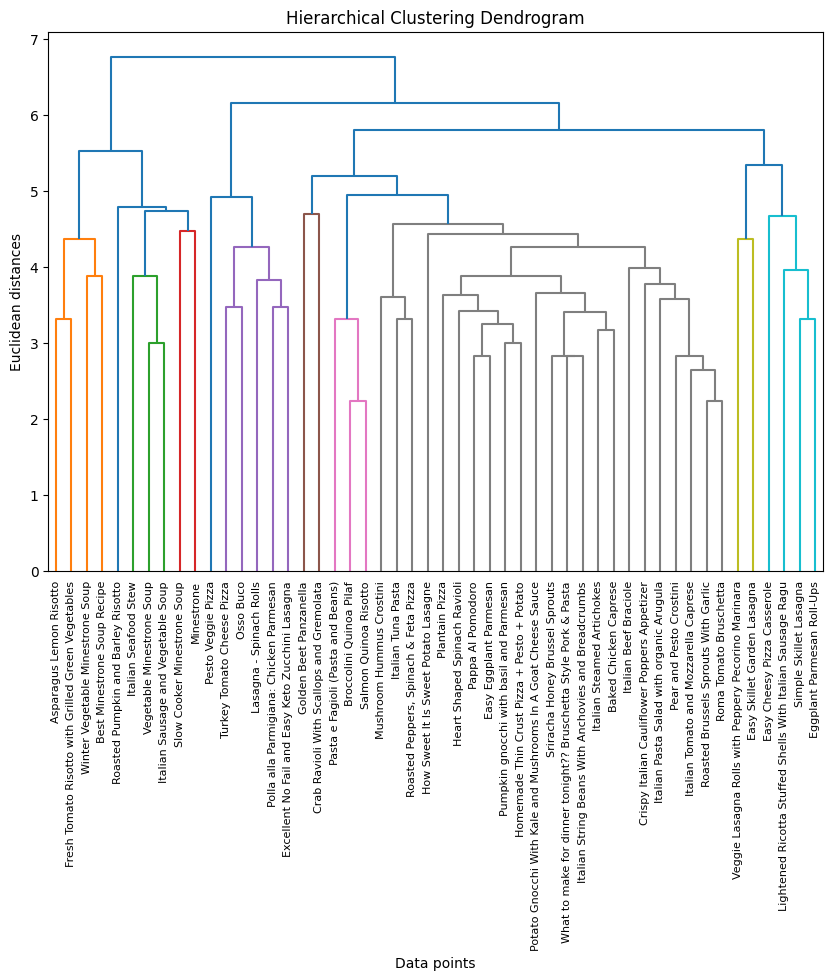

In [78]:
linkage_matrix = linkage(testCol.tolist(), method='ward')  # You can also use 'single', 'complete', 'average', etc.
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=[dfInd_toName[i] for i in dfInd_toName])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

## Finding Closest Foods, getting the recommendations:

In [96]:
# Define the threshold distance or number of clusters
threshold_distance = 4.8  # Adjust this value based on your dendrogram

# Extract flat clusters
flat_clusters = fcluster(linkage_matrix, t=threshold_distance, criterion='distance')  # Using distance criterion
recMap = {}

# Print the closest linked pairs for each item
for item, cluster in enumerate(flat_clusters):
    closest_linked_pairs = np.where(flat_clusters == cluster)[0]
    recMap[item] = closest_linked_pairs
    # print(f"Item {item} is closest to items {closest_linked_pairs}")
print(recMap)


{0: array([ 0, 16, 34, 35, 41]), 1: array([ 1,  3, 45]), 2: array([ 2,  4,  5,  7,  8,  9, 10, 11, 13, 19, 20, 23, 24, 25, 27, 29, 30,
       33, 36, 37, 42, 44, 47]), 3: array([ 1,  3, 45]), 4: array([ 2,  4,  5,  7,  8,  9, 10, 11, 13, 19, 20, 23, 24, 25, 27, 29, 30,
       33, 36, 37, 42, 44, 47]), 5: array([ 2,  4,  5,  7,  8,  9, 10, 11, 13, 19, 20, 23, 24, 25, 27, 29, 30,
       33, 36, 37, 42, 44, 47]), 6: array([ 6, 17, 26, 32]), 7: array([ 2,  4,  5,  7,  8,  9, 10, 11, 13, 19, 20, 23, 24, 25, 27, 29, 30,
       33, 36, 37, 42, 44, 47]), 8: array([ 2,  4,  5,  7,  8,  9, 10, 11, 13, 19, 20, 23, 24, 25, 27, 29, 30,
       33, 36, 37, 42, 44, 47]), 9: array([ 2,  4,  5,  7,  8,  9, 10, 11, 13, 19, 20, 23, 24, 25, 27, 29, 30,
       33, 36, 37, 42, 44, 47]), 10: array([ 2,  4,  5,  7,  8,  9, 10, 11, 13, 19, 20, 23, 24, 25, 27, 29, 30,
       33, 36, 37, 42, 44, 47]), 11: array([ 2,  4,  5,  7,  8,  9, 10, 11, 13, 19, 20, 23, 24, 25, 27, 29, 30,
       33, 36, 37, 42, 44, 47]), 1

In [85]:
final_recMap = {}
for key in recMap:
  translation = df_indMap[key]  # Turn df index into dish Id
  thisName = dfInd_toName[key] # Turn df index into dish name
  appender = []
  for val in recMap[key]:
    appender.append(df_indMap[val])
  final_recMap[thisName] = appender

print(final_recMap)

{'Turkey Tomato Cheese Pizza': [715495, 654125, 656571, 649270, 1046983], 'Broccolini Quinoa Pilaf': [715769, 659109, 654835], 'What to make for dinner tonight?? Bruschetta Style Pork & Pasta': [715538, 648279, 658515, 648257, 640819, 654614, 1095745, 658753, 716300, 648259, 657312, 656972, 646549, 647124, 647563, 658615, 1096088, 648275, 648190, 1096038, 655400, 648048, 641962], 'Salmon Quinoa Risotto': [715769, 659109, 654835], 'Italian Tuna Pasta': [715538, 648279, 658515, 648257, 640819, 654614, 1095745, 658753, 716300, 648259, 657312, 656972, 646549, 647124, 647563, 658615, 1096088, 648275, 648190, 1096038, 655400, 648048, 641962], 'Roasted Brussels Sprouts With Garlic': [715538, 648279, 658515, 648257, 640819, 654614, 1095745, 658753, 716300, 648259, 657312, 656972, 646549, 647124, 647563, 658615, 1096088, 648275, 648190, 1096038, 655400, 648048, 641962], 'Asparagus Lemon Risotto': [632935, 1095742, 1095751, 157991], 'Italian Steamed Artichokes': [715538, 648279, 658515, 648257, 

## Getting Cluster ids for each dish

In [86]:
clusterGroup = {}
for k in finalRecs:
  for dishId in finalRecs[k]:
    clusterGroup[dishId] = k
clusterGroup

{715495: 2,
 654125: 2,
 656571: 2,
 649270: 2,
 1046983: 2,
 655847: 2,
 715769: 3,
 715538: 3,
 659109: 3,
 648279: 3,
 658515: 3,
 648257: 3,
 640819: 3,
 654614: 3,
 1095745: 3,
 658753: 3,
 716300: 3,
 648259: 3,
 657312: 3,
 1095740: 3,
 656972: 3,
 646549: 3,
 647124: 3,
 647563: 3,
 658615: 3,
 1096088: 3,
 648275: 3,
 648190: 3,
 1096038: 3,
 655400: 3,
 640314: 3,
 648048: 3,
 654835: 3,
 641962: 3,
 632935: 0,
 664565: 0,
 1095742: 0,
 648247: 0,
 1095751: 0,
 648238: 0,
 660292: 0,
 157991: 0,
 651922: 0,
 658632: 0,
 641893: 1,
 664737: 1,
 642095: 1,
 715573: 1,
 642297: 1,
 650045: 1}

# Adding Clusters to final Df

In [93]:
italian_df["cluster"] = italian_df["id"].apply(lambda x: clusterGroup[x])
italian_df.sample(4)



,id,missedIngredients,vegan,cuisines,summary,aggregateLikes,image,encodedIngredients,labeled,name,cluster
19,648259,"[{'id': 15001, 'amount': 6.0, 'unit': 'fillet'...",False,"[Mediterranean, Italian, European]",Italian String Beans With Anchovies and Breadc...,1,https://img.spoonacular.com/recipes/648259-312...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Italian String Beans With Anchovies and Breadc...,3
21,1095740,"[{'id': 9152, 'amount': 2.0, 'unit': 'tablespo...",False,"[Mediterranean, Italian, European]",Golden Beet Panzanella might be just the side ...,1,https://img.spoonacular.com/recipes/1095740-31...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Golden Beet Panzanella,3
11,658753,"[{'id': 2069, 'amount': 2.0, 'unit': 'tablespo...",True,"[Mediterranean, Italian, European]","Need a <b>dairy free, lacto ovo vegetarian, an...",5,https://img.spoonacular.com/recipes/658753-312...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Roma Tomato Bruschetta,3
42,655400,"[{'id': 18029, 'amount': 0.5, 'unit': 'loaf', ...",False,"[Mediterranean, Italian, European]",Pear and Pesto Crostini is a Mediterranean rec...,2,https://img.spoonacular.com/recipes/655400-312...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Pear and Pesto Crostini,3


In [94]:
italian_df.set_index('id', inplace=True)
italian_df.sample(5)

# Pickle Dump of Final Reccomendations

In [ ]:
import pickle

with open("Italian_df_Reccomendations", "wb") as f:
  pickle.dump(italian_df, f)